<a href="https://colab.research.google.com/github/oleeejka/Github-codespase/blob/main/my_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

from matplotlib import pyplot as plt

Загружаем набор данных MNIST

In [ ]:
train_data = datasets.MNIST (
    root = 'data', ## Указывает директорию, где будет сохранен набор данных.
    train = True,
    transform = ToTensor(), ## ToTensor() конвертирует PIL изображения или
                            ## numpy.ndarray в тензоры PyTorch и нормализует
                            ## значения пикселей от 0-255 до 0-1.
    download = True ## Если набор данных не найден в указанной директории, он будет автоматически скачан.
)

test_data = datasets.MNIST (
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 50.2MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.61MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.1MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.70MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data.data ## выведет датасет

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [ ]:
test_data.data.size() ## size() аналогично shape

torch.Size([10000, 28, 28])

In [ ]:
train_data.targets.size() ## размер тензора с метками обучающего набора

torch.Size([60000])

**Dataloader**

In [ ]:
loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1), ## num_workers=1: Использует 1 подпроцесс для загрузки данных.
                                        ## Это может ускорить загрузку данных, особенно для больших наборов.

    'test': DataLoader(test_data,
                        batch_size=100,
                        shuffle=False,
                        num_workers=1),
}

**Architecture**

In [ ]:
class CNN(nn.Module):

  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d() ## regularization layer
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10) ## 10 output units for Softmax

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))

    ## we must flatten the data before fc layers
    x = x.view(-1, 320)

    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)


**GPU**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

**Optimizer**

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

Define loss function

In [ ]:
loss_fn = nn.CrossEntropyLoss()

**Функция для обучения**

In [ ]:
def train(epoch):
  model.train() ##  Переводит модель в режим обучения. Это важно, так как некоторые слои
                ## (например, Dropout или BatchNorm) ведут себя по-разному в режиме обучения и в режиме оценки.
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device) ##  Перемещает данные и целевые значения на указанное устройство (CPU или GPU).

    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)

    loss.backward()
    optimizer.step()

    if batch_idx % 20 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

## Эта строка выводит информацию о прогрессе обучения. Разберем ее по частям:
## Train Epoch: {epoch} выводит номер текущей эпохи обучения.
## [{batch_idx * len(data)}/{len(loaders['train'].dataset)}] показывает, сколько образцов уже обработано в текущей эпохе.
## batch_idx * len(data) - количество обработанных образцов (индекс текущего батча умножается на размер батча).
## len(loaders['train'].dataset) - общее количество образцов в обучающем наборе данных.
## ({100. * batch_idx / len(loaders['train']):.0f}%) Отображает процент завершения текущей эпохи.
## batch_idx / len(loaders['train']) - доля обработанных батчей. Умножение на 100 переводит это значение в проценты.
## {loss.item():.6f} Выводит значение функции потерь для текущего батча.

**Testing function**

In [ ]:
## Определение функции test(), которая будет оценивать производительность модели на тестовом наборе данных.
def test():
  model.eval() ## Переводит модель в режим оценки.

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']: ## Начинает цикл по батчам из тестового загрузчика данных.
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item() ## Вычисляет потерю для текущего батча и добавляет ее к общей сумме потерь. Метод .item() извлекает скалярное значение из тензора.
      pred = output.argmax(dim=1, keepdim=True) ## Получает предсказания модели, выбирая индекс с максимальным значением по измерению 1 (классы). keepdim=True сохраняет размерность тензора.
      correct += pred.eq(target.view_as(pred)).sum().item() ## Подсчитывает количество правильных предсказаний:
                                                            ##target.view_as(pred) изменяет форму целевого тензора, чтобы она соответствовала форме pred.
                                                            ##pred.eq(target.view_as(pred)) создает тензор булевых значений, где True означает правильное предсказание.

  test_loss /= len(loaders['test'].dataset)
  print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct} / {len(loaders['test'].dataset)}")
## Выводит среднюю потерю на тестовом наборе, test_loss - это сумма потерь для всех батчей, вычисленная в функции test(). И выводит точность модели на тестовом наборе.
## Обратите внимание, что здесь предполагается, что test_loss уже разделена на количество батчей или образцов для получения среднего значения.

In [ ]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-19-fafd0c5b4e68>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.303187
Train Epoch: 1 [2000/60000 (3%)]	2.265931
Train Epoch: 1 [4000/60000 (7%)]	2.178697
Train Epoch: 1 [6000/60000 (10%)]	2.005345
Train Epoch: 1 [8000/60000 (13%)]	1.925201
Train Epoch: 1 [10000/60000 (17%)]	1.851199
Train Epoch: 1 [12000/60000 (20%)]	1.746310
Train Epoch: 1 [14000/60000 (23%)]	1.773509
Train Epoch: 1 [16000/60000 (27%)]	1.743440
Train Epoch: 1 [18000/60000 (30%)]	1.703995
Train Epoch: 1 [20000/60000 (33%)]	1.714074
Train Epoch: 1 [22000/60000 (37%)]	1.687900
Train Epoch: 1 [24000/60000 (40%)]	1.692217
Train Epoch: 1 [26000/60000 (43%)]	1.712206
Train Epoch: 1 [28000/60000 (47%)]	1.671070
Train Epoch: 1 [30000/60000 (50%)]	1.695120
Train Epoch: 1 [32000/60000 (53%)]	1.597661
Train Epoch: 1 [34000/60000 (57%)]	1.614207
Train Epoch: 1 [36000/60000 (60%)]	1.672397
Train Epoch: 1 [38000/60000 (63%)]	1.662783
Train Epoch: 1 [40000/60000 (67%)]	1.639984
Train Epoch: 1 [42000/60000 (70%)]	1.633377
Train Epoch: 1 [44000/60000 (73%)]	1.608779

KeyboardInterrupt: 

Визуализация

<ipython-input-19-fafd0c5b4e68>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 7


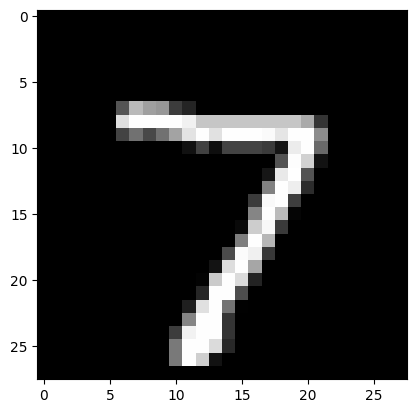

In [ ]:
## Этот код делает следующее:

    ## Берет первое изображение из тестового набора.
    ## Пропускает его через обученную модель для получения предсказания.
    ## Выводит предсказанный класс (цифру).
    ## Отображает само изображение.

import matplotlib.pyplot as plt

model.eval() # переводит модель в режим оценки.

data, target = test_data[0] ##  Извлекает первый образец и его метку из тестового набора данных.

data = data.unsqueeze(0).to(device) ## unsqueeze(0) добавляет размерность батча (превращает [1, 28, 28] в [1, 1, 28, 28]).

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item() ## argmax(dim=1) находит индекс максимального значения (предсказанный класс).

print(f'Prediction: {prediction}') ## Выводит предсказанный класс (цифру).

image = data.squeeze(0).squeeze(0).cpu().numpy() ## squeeze(0) удаляет размерности батча и канала.
                                                 ## cpu() перемещает данные обратно на CPU (если они были на GPU).
                                                 ## numpy() преобразует тензор PyTorch в массив NumPy.


plt.imshow(image, cmap='gray') # imshow() отображает изображение.
plt.show()